In [ ]:
#Import Libaries Data Frame
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# unemployment data
unemp_data=pd.read_excel("data/Unemployment.xls", header=7)
unemp_data = unemp_data[unemp_data.FIPS%1000 != 0]

# population data
pop_data=pd.read_excel("data/PopulationEstimates.xls", header=2)
pop_data[pop_data.FIPS%1000 != 0]

# join unemployment and population data
data = unemp_data[["FIPS","Unemployment_rate_2018"]].merge(pop_data[["FIPS","POP_ESTIMATE_2018","N_POP_CHG_2018"]],on="FIPS")
data.columns = ["FIPS","unemploy_rate","pop_2018","pop_change_2018"]

# make pop_change_2018 a ratio by dividing by the total population
data.pop_change_2018 = data.pop_change_2018/data.pop_2018

In [20]:
data.info()
#unemp_data.info()
#print(pop_data.info(verbose = True))

,FIPS,unemploy_rate,pop_2018,pop_change_2018
0,1001,3.6,55601,0.002842
1,1003,3.6,218022,0.024782
2,1005,5.2,24881,-0.011133
3,1007,4.0,22400,-0.006920
4,1009,3.5,57840,0.000225
...,...,...,...,...
3214,72145,10.4,50185,NaN
3215,72147,16.5,8364,NaN
3216,72149,15.9,21476,NaN
3217,72151,14.3,32158,NaN


## Analysis of Unemployment Rate in 2018

Description of Unemployment Rate:
count    3219.000000
mean        4.302889
std         1.894238
min         1.300000
5%          2.400000
10%         2.600000
25%         3.100000
50%         3.900000
75%         4.900000
90%         6.100000
95%         7.400000
max        19.900000
Name: unemploy_rate, dtype: float64 


Text(0.5, 1.0, 'Distribution of Unemployment Rate in 2018')


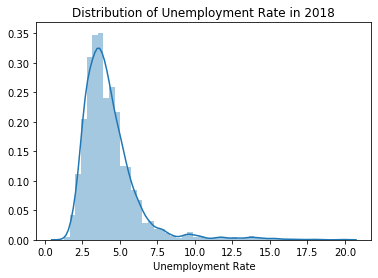

In [3]:
# Analysis
print("Description of Unemployment Rate:")
print(data.unemploy_rate.describe(percentiles=[.05,.1,.25, .5, .75,.9,.95]),"\n\n")

# Visualization
print(sb.distplot(data.unemploy_rate.dropna(),axlabel="Unemployment Rate").set_title("Distribution of Unemployment Rate in 2018"))

## Analysis of Population in 2018

Description of Population:
count    3.219000e+03
mean     1.026289e+05
std      3.296815e+05
min      1.520000e+02
5%       2.840900e+03
10%      5.186200e+03
25%      1.115000e+04
50%      2.609200e+04
75%      6.702750e+04
90%      2.076590e+05
95%      4.361302e+05
max      1.010552e+07
Name: pop_2018, dtype: float64 




Text(0.5, 1.0, 'Distribution of Population in 2018')

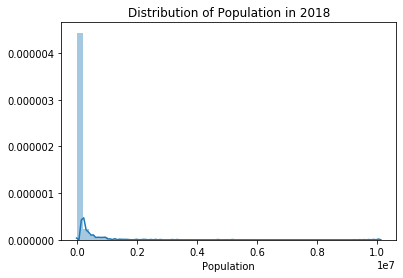

In [4]:
# Analysis
print("Description of Population:")
print(data.pop_2018.describe(percentiles=[.05,.1,.25, .5, .75,.9,.95]),"\n\n")

# Visualization
sb.distplot(data.pop_2018.dropna(),axlabel="Population").set_title("Distribution of Population in 2018")

## Analysis of Population Change in 2018

Description of Population Change:
count    3141.000000
mean        0.001844
std         0.011826
min        -0.069561
5%         -0.015330
10%        -0.011472
25%        -0.005202
50%         0.001317
75%         0.008009
90%         0.015668
95%         0.021418
max         0.105263
Name: pop_change_2018, dtype: float64 




Text(0.5, 1.0, 'Distribution of Population Change in 2018')

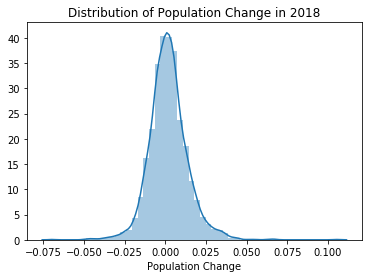

In [5]:
# Analysis
print("Description of Population Change:")
print(data.pop_change_2018.describe(percentiles=[.05,.1,.25, .5, .75,.9,.95]),"\n\n")

# Visualization
sb.distplot(data.pop_change_2018.dropna(),axlabel="Population Change").set_title("Distribution of Population Change in 2018")

## Analysis of Relationship between Unemployment Rate and Population

Correlation: -0.0474628177121681


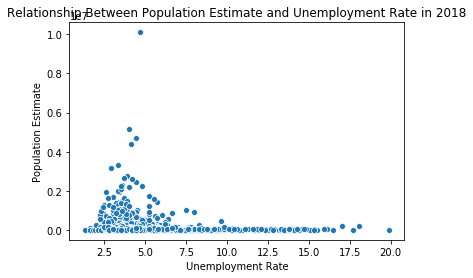

In [16]:
# Analysis
print("Correlation:", np.corrcoef(data.unemploy_rate,data.pop_2018)[1,0])

#Visualization
sb.scatterplot(x = data.unemploy_rate, y = data.pop_2018)
plt.title("Relationship Between Population Estimate and Unemployment Rate in 2018")
plt.xlabel("Unemployment Rate")
plt.ylabel("Population Estimate")

We can conclude that only smaller counties have a very high unemployment rate. However, the graph suggests that population and unemployment are mostly independent. This is also supported by the fact that the correlation coefficient is close to zero.

## Analysis of Relationship between Unemployment Rate and Population

Text(0, 0.5, 'Population Change')

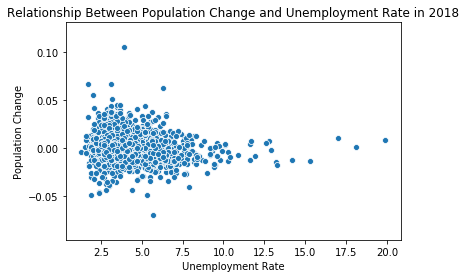

In [15]:
#Visualization
sb.scatterplot(x = data.unemploy_rate, y = data.pop_change_2018)
plt.title("Relationship Between Population Change and Unemployment Rate in 2018")
plt.xlabel("Unemployment Rate")
plt.ylabel("Population Change")

Since there is such a high variation of population change relative to unemployment rate, and that it is symmetrical along the x-axis, we can conclude population change is relatively independent of unemployment rate.